# Titanic - sexAndPclass

In [19]:
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join

path_dir = join("..", "..", "data", "feature_engineered")

train = pd.read_csv(join(path_dir, "baseline", "baseline_engineered_train.csv"))
test = pd.read_csv(join(path_dir, "baseline", "baseline_engineered_test.csv"))

df_train = train.copy()
df_test = test.copy()

df_train.head(3)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [22]:
for i in range(1, 4):
    df_train[f'FemaleAndPclass={i}'] = ((df_train['Sex'] == 0) & (df_train['Pclass'] == i)).astype(int)
    df_train[f'MaleAndPclass={i}'] = ((df_train['Sex'] == 1) & (df_train['Pclass'] == i)).astype(int)
    df_test[f'FemaleAndPclass={i}'] = ((df_train['Sex'] == 0) & (df_train['Pclass'] == i)).astype(int)
    df_test[f'MaleAndPclass={i}'] = ((df_train['Sex'] == 1) & (df_train['Pclass'] == i)).astype(int)
    
df_train = df_train.drop(["PassengerId", "Sex", "Pclass"], axis=1)
df_test = df_test.drop(["PassengerId", "Sex", "Pclass"], axis=1)
df_train.head(3)

,Survived,Age,SibSp,Parch,Fare,Embarked,FemaleAndPclass=1,MaleAndPclass=1,FemaleAndPclass=2,MaleAndPclass=2,FemaleAndPclass=3,MaleAndPclass=3
0,0,22.0,1,0,7.2500,2,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,2,0,0,0,0,1,0


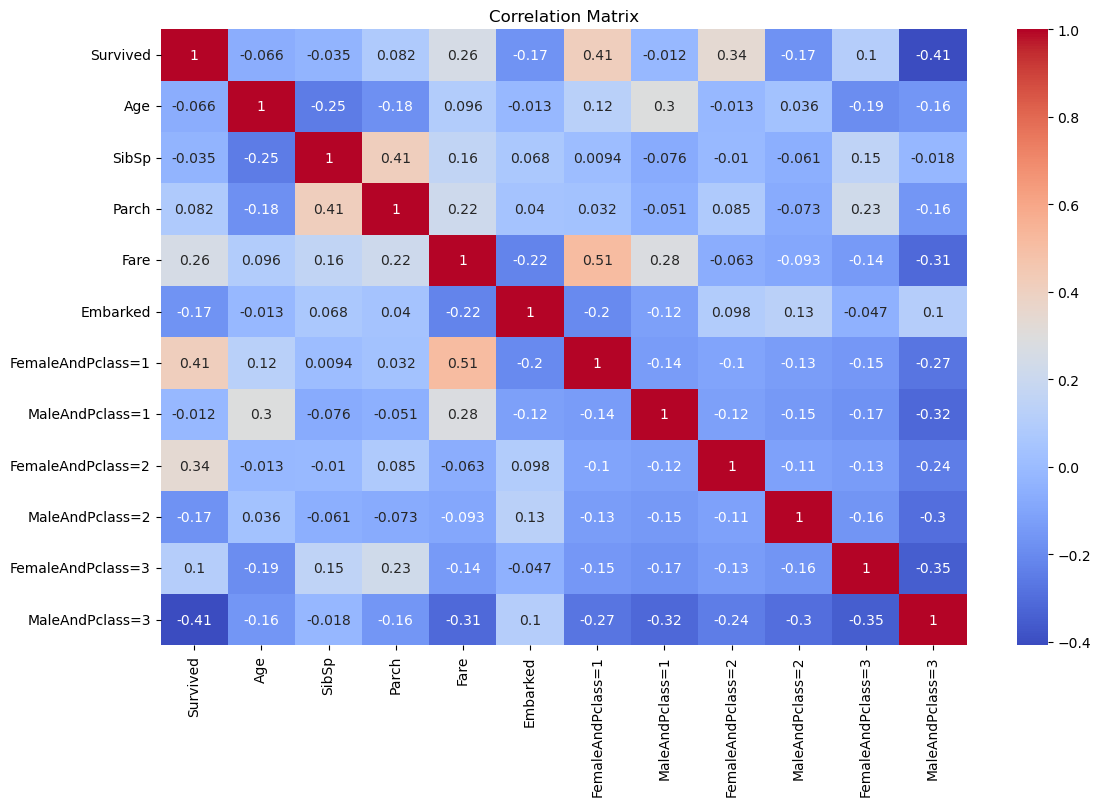

In [23]:
plt.figure(figsize=(13,8))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [24]:
df_train.to_csv(join(path_dir, "sexAndPclass", "sexAndPclass_engineered_train.csv"), index=False)
df_test.to_csv(join(path_dir, "sexAndPclass", "sexAndPclass_engineered_test.csv"), index=False)

# The end